In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

<h1>0. Preparando a base</h1>

In [90]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (12, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

In [91]:
df = pd.read_csv('Covid Data.csv')

In [92]:
df.shape

(1048575, 21)

In [93]:
df.dtypes

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object

In [94]:
[df[col].value_counts() for col in df.columns if df[col].dtype == 'int64']

[2    662903
 1    385672
 Name: USMER, dtype: int64,
 12    602995
 4     314405
 6      40584
 9      38116
 3      19175
 8      10399
 10      7873
 5       7244
 11      5577
 13       996
 7        891
 2        169
 1        151
 Name: MEDICAL_UNIT, dtype: int64,
 1    525064
 2    523511
 Name: SEX, dtype: int64,
 1    848544
 2    200031
 Name: PATIENT_TYPE, dtype: int64,
 97    848544
 2     159050
 1      33656
 99      7325
 Name: INTUBED, dtype: int64,
 2     892534
 1     140038
 99     16003
 Name: PNEUMONIA, dtype: int64,
 30     27010
 31     25927
 28     25313
 29     25134
 34     24872
        ...  
 114        2
 116        2
 111        1
 121        1
 113        1
 Name: AGE, Length: 121, dtype: int64,
 97    523511
 2     513179
 1       8131
 98      3754
 Name: PREGNANT, dtype: int64,
 2     920248
 1     124989
 98      3338
 Name: DIABETES, dtype: int64,
 2     1030510
 1       15062
 98       3003
 Name: COPD, dtype: int64,
 2     1014024
 1       31572
 

Valores 98 ou 99 normalmente se referem aos números nulos. Para o caso da variável Pregnant, valores 97 indicam que o paciente é um homem (valores 99 são NAs). No caso da variável ICU (Intensive Care Unity) a variável 97 indica pacientes que foram tratados em casa e, portanto, nem foram considerados para o tratamento na unidade intensiva

<h1>1. EDA: Verificando o perfil geral dos pacientes </h1>

Perfil geral de idade e gênero entre os pacientes

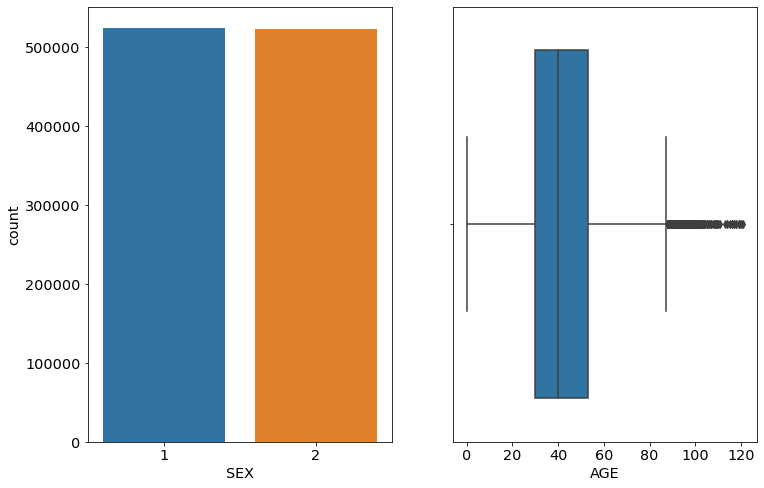

In [95]:
fig, axs = plt.subplots(1,2)
ax1 = sns.countplot(x=df['SEX'], ax=axs[0])
ax2 = sns.boxplot(x='AGE', data=df, ax=axs[1])
#ax2.axvline(x=df['AGE'].mean(), color='red')

In [96]:
print('Existe uma paridade na distribuição de gênero dos pacientes com covid. A idade da maioria dos pacientes fica entre {} e {} anos'.format(df['AGE'].quantile(0.25), df['AGE'].quantile(0.75)))

Existe uma paridade na distribuição de gênero dos pacientes com covid. A idade da maioria dos pacientes fica entre 30.0 e 53.0 anos


In [97]:
#df['HAS_COVID'] = np.where(df['CLASIFFICATION_FINAL'] == (1 or 2 or 3), 1, 0)


#fig, axs = plt.subplots(1,1)
#ax1 = sns.countplot(x=df['CLASIFFICATION_FINAL'])

In [99]:
df['HAS_COVID'].value_counts()

0    1039974
1       8601
Name: HAS_COVID, dtype: int64

<AxesSubplot:xlabel='DATE_DIED,DATE_DIED'>

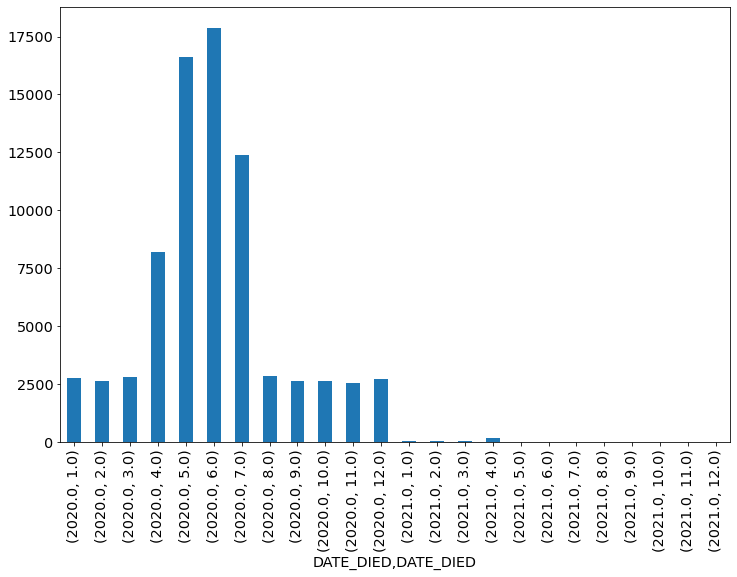

In [60]:
df['DATE_DIED'] = df['DATE_DIED'].replace('9999-99-99', np.nan)
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'])
df['USMER'].groupby([df['DATE_DIED'].dt.year, df['DATE_DIED'].dt.month]).count().plot(kind='bar')

A maior parte dos casos no méxico ocorreu entre maio e julho de 2020. A diminuição em 2021 se deu pela diminuição de casos ou do relato de ocorrências?